> # *Used Car Price Prediction*

## Import Modules required

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pycaret.regression import *

## Data Overview

In [2]:
# load dataset and take overview

dataset = pd.read_csv("dataset.csv")
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [1]:
# View basic information related to dataset 

dataset.info()

NameError: name 'dataset' is not defined

## Data Cleaning

In [4]:
# Remove columns that are not usefull

dataset.drop(columns=['Unnamed: 0','New_Price','Name','Location'],inplace=True)

In [5]:
# find duplicate rows 

series = dataset.duplicated()
series[series == True]

2940    True
4781    True
dtype: bool

In [6]:
# View duplicate rows 

dataset.loc[[2940,4781]]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2940,2016,29000,Diesel,Manual,First,27.39 kmpl,1248 CC,74 bhp,5.0,6.50
4781,2007,52195,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,1.75


In [7]:
# Remove duplicate rows

dataset.drop([2940,4781],axis=0,inplace=True)

In [8]:
# count of duplicate rows to cross check that all duplicates has been removed

dataset.duplicated().sum()

0

In [9]:
# count of null values in every column

col = dataset.columns
col = list(col)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

Year => 0
Kilometers_Driven => 0
Fuel_Type => 0
Transmission => 0
Owner_Type => 0
Mileage => 2
Engine => 36
Power => 36
Seats => 42
Price => 0


In [10]:
# Drop all rows where any value is null, As number of rows are not much so we can drop them

dataset.dropna(inplace=True)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

Year => 0
Kilometers_Driven => 0
Fuel_Type => 0
Transmission => 0
Owner_Type => 0
Mileage => 0
Engine => 0
Power => 0
Seats => 0
Price => 0


In [11]:
# drop rows where power is 'null bhp'

dataset = dataset.drop( dataset[dataset["Power"]=='null bhp'].index )

In [12]:
# Format data of columns (engine,mileage,power), seperate values from unit

dataset["Engine"] = dataset["Engine"].apply(lambda x : float(str(x).split(" ")[0]))
dataset["Mileage"] = dataset["Mileage"].apply(lambda x : float(str(x).split(" ")[0]))
dataset["Power"] = dataset["Power"].apply(lambda x : float(str(x).split(" ")[0]))
dataset.sample()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1066,2010,82407,Diesel,Manual,First,17.5,1896.0,106.0,5.0,4.25


## Data Exploration And Visualization

In [13]:
# find count of datapoints by fuel type 

dataset["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3151
Petrol    2654
CNG         55
LPG         10
Name: count, dtype: int64

In [14]:
# find count of datapoints by Transmission mode 

dataset["Transmission"].value_counts()

Transmission
Manual       4168
Automatic    1702
Name: count, dtype: int64

In [15]:
# find count of datapoints by owner type 

dataset["Owner_Type"].value_counts()

Owner_Type
First             4837
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

In [16]:
# find count of datapoints by Seats

dataset["Seats"].value_counts()

Seats
5.0     4917
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: count, dtype: int64

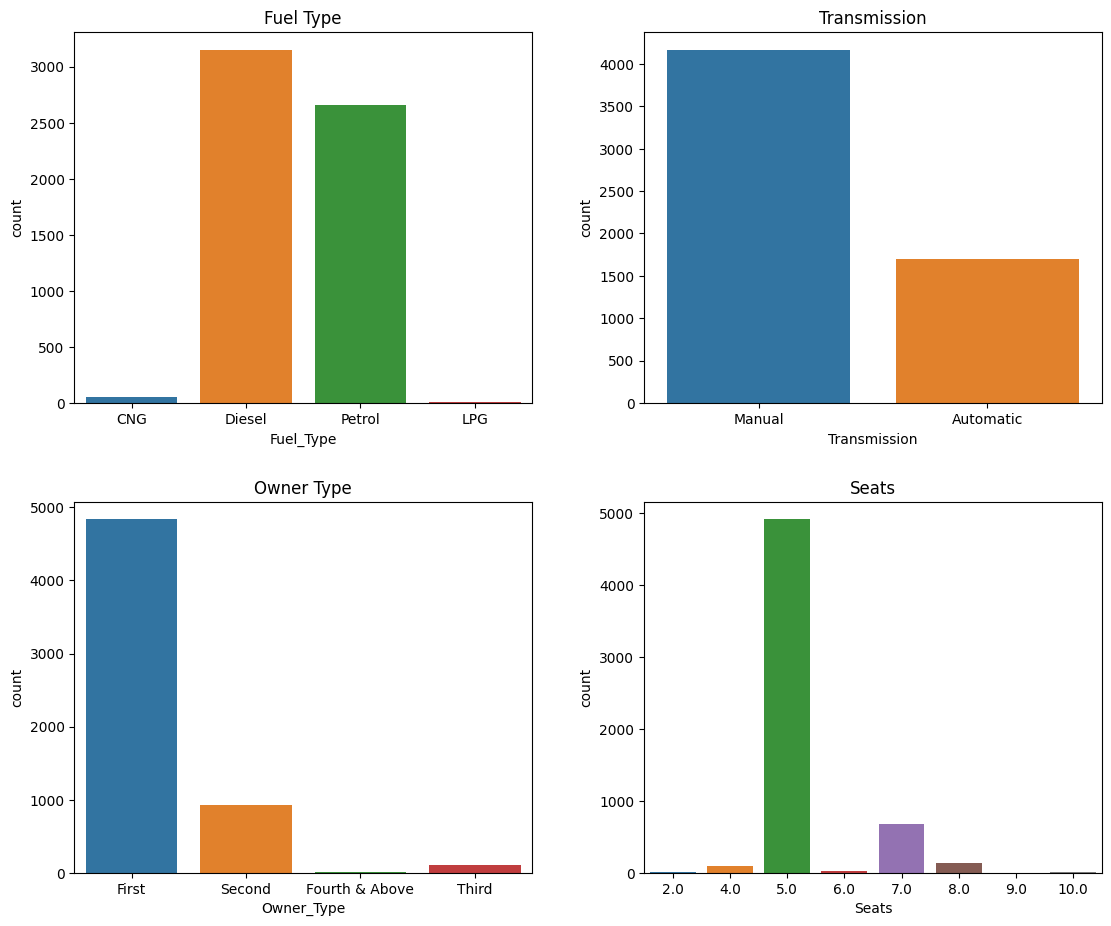

In [17]:
# plot Seats, Owner_Type, Transmission, Fuel_type

figure, axis = plt.subplots(2, 2,figsize=(11, 9))
figure.tight_layout(h_pad=5,w_pad=5)
# plot fuel type
sns.countplot(data=dataset,x='Fuel_Type',ax=axis[0][0])
axis[0][0].set_title("Fuel Type")
# plot fuel type 
sns.countplot(data=dataset,x='Transmission',ax=axis[0][1])
axis[0][1].set_title("Transmission")
# plot fuel type 
sns.countplot(data=dataset,x='Owner_Type',ax=axis[1][0])
axis[1][0].set_title("Owner Type")
# plot fuel type 
sns.countplot(data=dataset,x='Seats',ax=axis[1][1])
axis[1][1].set_title("Seats")

plt.show()

In [18]:
dataset.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<Axes: xlabel='Mileage', ylabel='Price'>

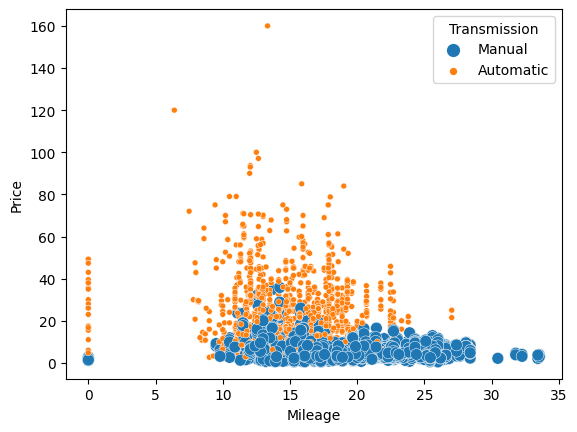

In [19]:
sns.scatterplot(data=dataset,x='Mileage', y='Price',hue='Transmission',size='Transmission')

# price of automatic transmission is more for same mileage

<Axes: xlabel='Power', ylabel='Price'>

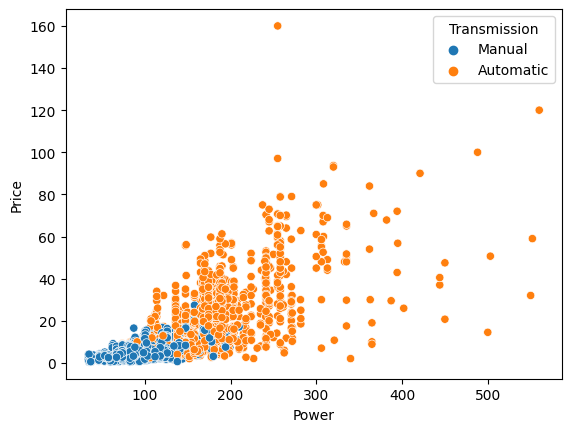

In [20]:
sns.scatterplot(data=dataset,x='Power',y='Price',hue='Transmission')

# price increases with increase in power
# And price of automatic transmission is more than manual for same power

<Axes: xlabel='Engine', ylabel='Price'>

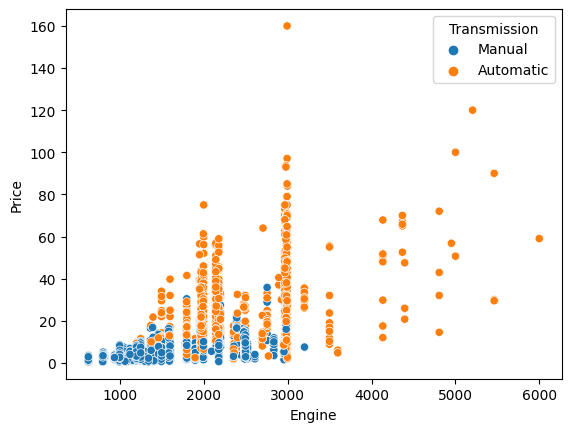

In [21]:
sns.scatterplot(data=dataset,x='Engine',y='Price',hue='Transmission')

# price of automatic transmission is more than manual for same displacement volume of the engine

<Axes: xlabel='Year', ylabel='Price'>

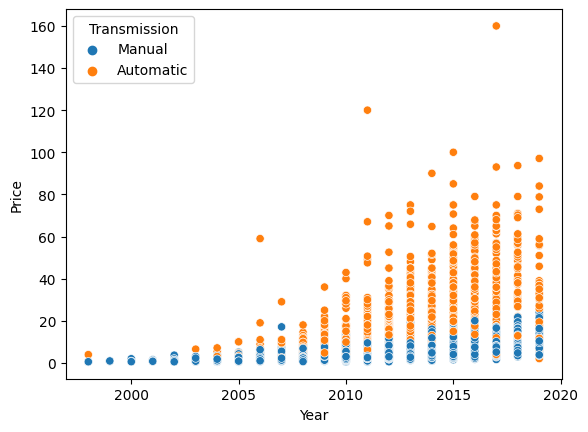

In [22]:
sns.scatterplot(data=dataset,x='Year',y='Price',hue='Transmission')

# price increases with increase in year or edition of model.
# And price of automatic transmission is more than manual for same year or edition of mode.

## Data Transformation

In [23]:
# Transform fuel type from string to integer

fuel = {
    "Diesel" : 1,
    "Petrol" : 2,
    "CNG" : 3,
    "LPG" : 4
}
dataset["Fuel_Type"] = dataset["Fuel_Type"].apply(lambda x : fuel[x])
dataset["Fuel_Type"].value_counts()

Fuel_Type
1    3151
2    2654
3      55
4      10
Name: count, dtype: int64

In [24]:
# Transform transmission mode from string to integer

trans = {
    "Manual" : 1,
    "Automatic" : 2
}
dataset["Transmission"] = dataset["Transmission"].apply(lambda x : trans[x])
dataset["Transmission"].value_counts()

Transmission
1    4168
2    1702
Name: count, dtype: int64

In [25]:
# Transform owner type from string to integer

owner = {
    "First" : 1,
    "Second" : 2,
    "Third" : 3,
    "Fourth & Above" : 4
}
dataset["Owner_Type"] = dataset["Owner_Type"].apply(lambda x : owner[x])
dataset["Owner_Type"].value_counts()

Owner_Type
1    4837
2     925
3     101
4       7
Name: count, dtype: int64

## Data Analysis

In [26]:
dataset.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [27]:
# View basic analysis of columns 

dataset.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5870.000000,5.870000e+03,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000
mean,2013.478365,5.832304e+04,1.475980,1.289949,1.195571,18.276044,1625.951278,113.294995,5.283816,9.605785
std,3.163806,9.218428e+04,0.527666,0.453777,0.446009,4.364740,601.626564,53.881538,0.805201,11.250830
min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.343125e+04,1.000000,1.000000,1.000000,15.260000,1198.000000,75.000000,5.000000,3.520000
50%,2014.000000,5.262150e+04,1.000000,1.000000,1.000000,18.200000,1496.000000,97.700000,5.000000,5.750000
75%,2016.000000,7.240825e+04,2.000000,2.000000,1.000000,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [28]:
# find correlation matrix

corr_matrix = dataset.corr()
corr_matrix

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169420,-0.104875,0.085311,-0.386295,0.285680,-0.068482,0.014205,0.007762,0.299407
Kilometers_Driven,-0.169420,1.000000,-0.101483,-0.024155,0.080399,-0.060515,0.092999,0.033443,0.083052,-0.008272
Fuel_Type,-0.104875,-0.101483,1.000000,-0.147384,0.038064,-0.060675,-0.428744,-0.298723,-0.300361,-0.317022
Transmission,0.085311,-0.024155,-0.147384,1.000000,-0.002409,-0.368301,0.501842,0.644632,-0.074638,0.585586
Owner_Type,-0.386295,0.080399,0.038064,-0.002409,1.000000,-0.148651,0.058568,0.025860,0.011472,-0.091179
Mileage,0.285680,-0.060515,-0.060675,-0.368301,-0.148651,1.000000,-0.637325,-0.538816,-0.331564,-0.341661
Engine,-0.068482,0.092999,-0.428744,0.501842,0.058568,-0.637325,1.000000,0.866253,0.401082,0.658014
Power,0.014205,0.033443,-0.298723,0.644632,0.025860,-0.538816,0.866253,1.000000,0.101361,0.772835
Seats,0.007762,0.083052,-0.300361,-0.074638,0.011472,-0.331564,0.401082,0.101361,1.000000,0.055492
Price,0.299407,-0.008272,-0.317022,0.585586,-0.091179,-0.341661,0.658014,0.772835,0.055492,1.000000


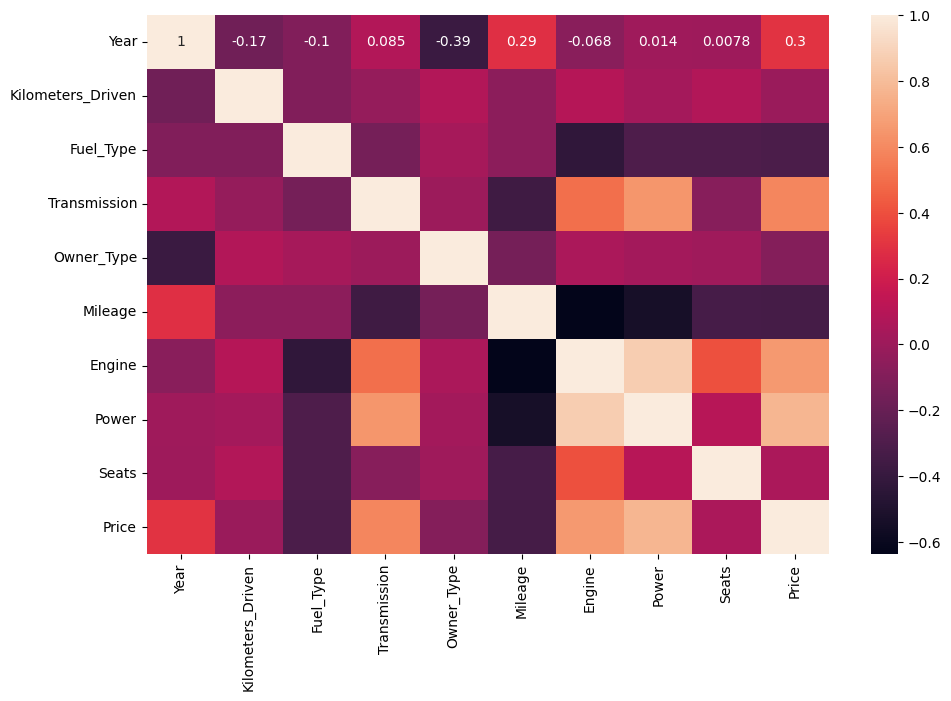

In [29]:
# plotting the heatmap for correlation matrix

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(11, 7))
# drawing the plot
sns.heatmap(dataset.corr(), annot=True)
plt.show()

##  Modeling

In [ ]:
# init setup of pycaret regression 
s = setup(dataset, target = 'Price', session_id = 123)

In [ ]:
# compare baseline models
best = compare_models()